In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Import the dataset using Pandas from above mentioned url.

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


### 2. High Level Data Understanding:

#### a. Find no. of rows & columns in the dataset

In [6]:
df.shape

(57394, 49)

The dataset has 57394 rows and 49 columns

#### b. Data types of columns.

In [9]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

#### c. Info & describe of data in dataframe.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,53758.0,1.677974e+05,1.693038e+06,1.000,1.800000e+02,2.070000e+03,2.235675e+04,5.515465e+07
new_cases,56465.0,1.953577e+03,1.826965e+04,-8261.000,0.000000e+00,1.400000e+01,2.350000e+02,6.462810e+05
new_cases_smoothed,55652.0,1.920432e+03,1.777739e+04,-552.000,8.570000e-01,1.942900e+01,2.452860e+02,5.849819e+05
total_deaths,44368.0,6.858639e+03,5.578081e+04,1.000,1.300000e+01,8.400000e+01,7.270000e+02,1.328537e+06
new_deaths,56465.0,4.705432e+01,3.908538e+02,-1918.000,0.000000e+00,0.000000e+00,4.000000e+00,1.060000e+04
new_deaths_smoothed,55652.0,4.683544e+01,3.782728e+02,-232.143,0.000000e+00,2.860000e-01,4.000000e+00,9.027714e+03
total_cases_per_million,53471.0,3.139100e+03,6.183455e+03,0.001,9.003300e+01,5.936630e+02,3.487050e+03,7.654177e+04
new_cases_per_million,56401.0,3.934480e+01,1.339852e+02,-2212.545,0.000000e+00,2.194000e+00,2.594100e+01,8.652658e+03
new_cases_smoothed_per_million,55587.0,3.840321e+01,1.016494e+02,-269.978,2.600000e-01,3.863000e+00,2.967850e+01,2.472188e+03
total_deaths_per_million,44096.0,9.533529e+01,1.807217e+02,0.000,3.977750e+00,2.038300e+01,9.057125e+01,1.248014e+03


### 3. Low Level Data Understanding 

a. Find count of unique values in location column.

In [15]:
df.location.nunique()

216

In [16]:
df.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

b. Find which continent has maximum frequency using values counts.

In [18]:
df.continent.value_counts()

continent
Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: count, dtype: int64

c. Find maximum & mean value in 'total_cases'.

In [20]:
df.total_cases.mean()

167797.3688753302

In [21]:
np.max(df.total_cases)

55154651.0

d. Find 25%,50% & 75% quartile value in 'total_deaths'

In [51]:
df.total_deaths.quantile([0.25,0.50,0.75])

0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64

e. Find which continent has maximum 'human_development_index'.

In [106]:
df[df.human_development_index == df.human_development_index.max()][['continent']].head(1)

,continent
38632,Europe


f. Find which continent has minimum 'gdp_per_capita'.

In [109]:
df[df.gdp_per_capita == df.gdp_per_capita.min()][['continent']].head(1)

,continent
10259,Africa


4. Filter the dataframe with only this columns['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'] and update the data frame.

In [112]:
df_updated = df[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]
df_updated.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


### 5. Data Cleaning

a. Remove all duplicates observations

In [119]:
df[df_updated.duplicated()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index


b. Find missing values in all columns

In [122]:
df_updated.isna().sum()

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

c. Remove all observations where continent column value is missing

In [124]:
df_updated.dropna(subset=['continent'],inplace=True)

C:\Users\Anutthamaa\AppData\Local\Temp\ipykernel_31368\1012225444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.dropna(subset=['continent'],inplace=True)


In [126]:
df_updated.isna().sum()

continent                      0
location                       0
date                           0
total_cases                 3600
total_deaths               12964
gdp_per_capita              6704
human_development_index     7501
dtype: int64

d. Fill all missing values with 0

In [132]:
df_updated.fillna(0, inplace=True)

C:\Users\Anutthamaa\AppData\Local\Temp\ipykernel_31368\2959571245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.fillna(0, inplace=True)


In [134]:
df_updated.isna().sum()

continent                  0
location                   0
date                       0
total_cases                0
total_deaths               0
gdp_per_capita             0
human_development_index    0
dtype: int64

### 6. Date time format 

a. Convert date column in datetime format using pandas.to_datetime

In [150]:
df_updated['date']  = pd.to_datetime(df_updated['date'])

C:\Users\Anutthamaa\AppData\Local\Temp\ipykernel_31368\1559715483.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_updated['date']  = pd.to_datetime(df_updated['date'])
C:\Users\Anutthamaa\AppData\Local\Temp\ipykernel_31368\1559715483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['date']  = pd.to_datetime(df_updated['date'])


In [152]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56748 entries, 0 to 56747
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   continent                56748 non-null  object        
 1   location                 56748 non-null  object        
 2   date                     56748 non-null  datetime64[ns]
 3   total_cases              56748 non-null  float64       
 4   total_deaths             56748 non-null  float64       
 5   gdp_per_capita           56748 non-null  float64       
 6   human_development_index  56748 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.5+ MB


b. Create new column month after extracting month data from date column.

In [162]:
df_updated['month'] = df_updated['date'].dt.month

C:\Users\Anutthamaa\AppData\Local\Temp\ipykernel_31368\2956230574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['month'] = df_updated['date'].dt.month


In [164]:
df_updated.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4


### 7. Data Aggregation

a. Find max value in all columns using groupby function on 'continent' column

In [182]:
df_updated.groupby('continent')[['total_cases','total_deaths','gdp_per_capita','human_development_index']].max()

,total_cases,total_deaths,gdp_per_capita,human_development_index
continent,,,,
Africa,752269.0,20314.0,26382.287,0.797
Asia,8874290.0,130519.0,116935.600,0.933
Europe,1991233.0,52147.0,94277.965,0.953
North America,11205486.0,247220.0,54225.446,0.926
Oceania,27750.0,907.0,44648.710,0.939
South America,5876464.0,166014.0,22767.037,0.843


b. Store the result in a new dataframe named 'df_groupby'.

In [197]:
df_groupby = df_updated.groupby('continent')[['total_cases','total_deaths','gdp_per_capita','human_development_index']].max()
df_groupby.reset_index(inplace=True)

### 8. Feature Engineering 

a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'

In [205]:
df_groupby['total_deaths_to_total_cases'] = np.round(df_groupby.total_deaths/df_groupby.total_cases,3)

In [207]:
df_groupby.head()

,continent,total_cases,total_deaths,gdp_per_capita,human_development_index,total_deaths_to_total_cases
0,Africa,752269.0,20314.0,26382.287,0.797,0.027
1,Asia,8874290.0,130519.0,116935.600,0.933,0.015
2,Europe,1991233.0,52147.0,94277.965,0.953,0.026
3,North America,11205486.0,247220.0,54225.446,0.926,0.022
4,Oceania,27750.0,907.0,44648.710,0.939,0.033


### 9. Data Visualization 

a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.

C:\Users\Anutthamaa\AppData\Local\Temp\ipykernel_31368\1055257113.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_groupby['gdp_per_capita'], kde=True)


<Axes: xlabel='gdp_per_capita', ylabel='Density'>

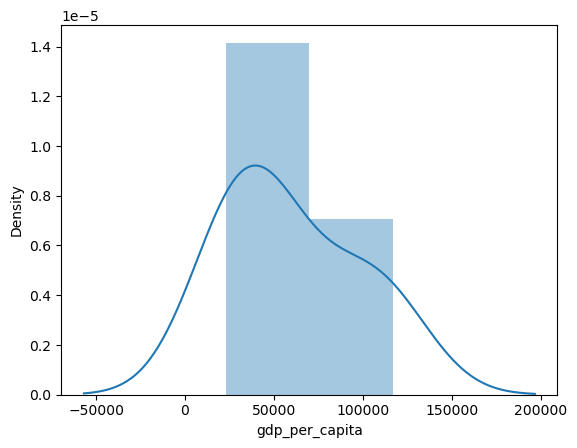

In [228]:
sns.distplot(df_groupby['gdp_per_capita'], kde=True)

b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'

<Axes: xlabel='gdp_per_capita', ylabel='total_cases'>

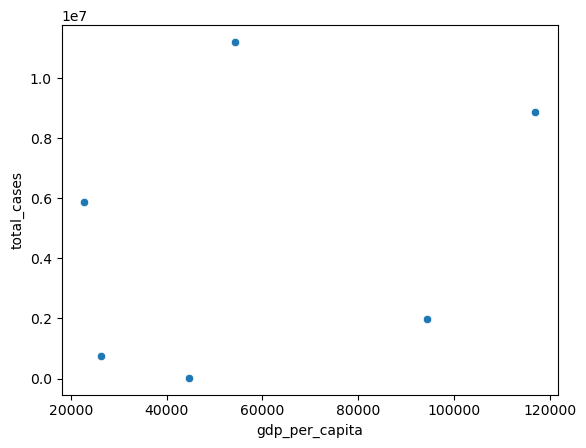

In [243]:
sns.scatterplot(y='total_cases',x='gdp_per_capita',data=df_groupby)

c. Plot Pairplot on df_groupby dataset.

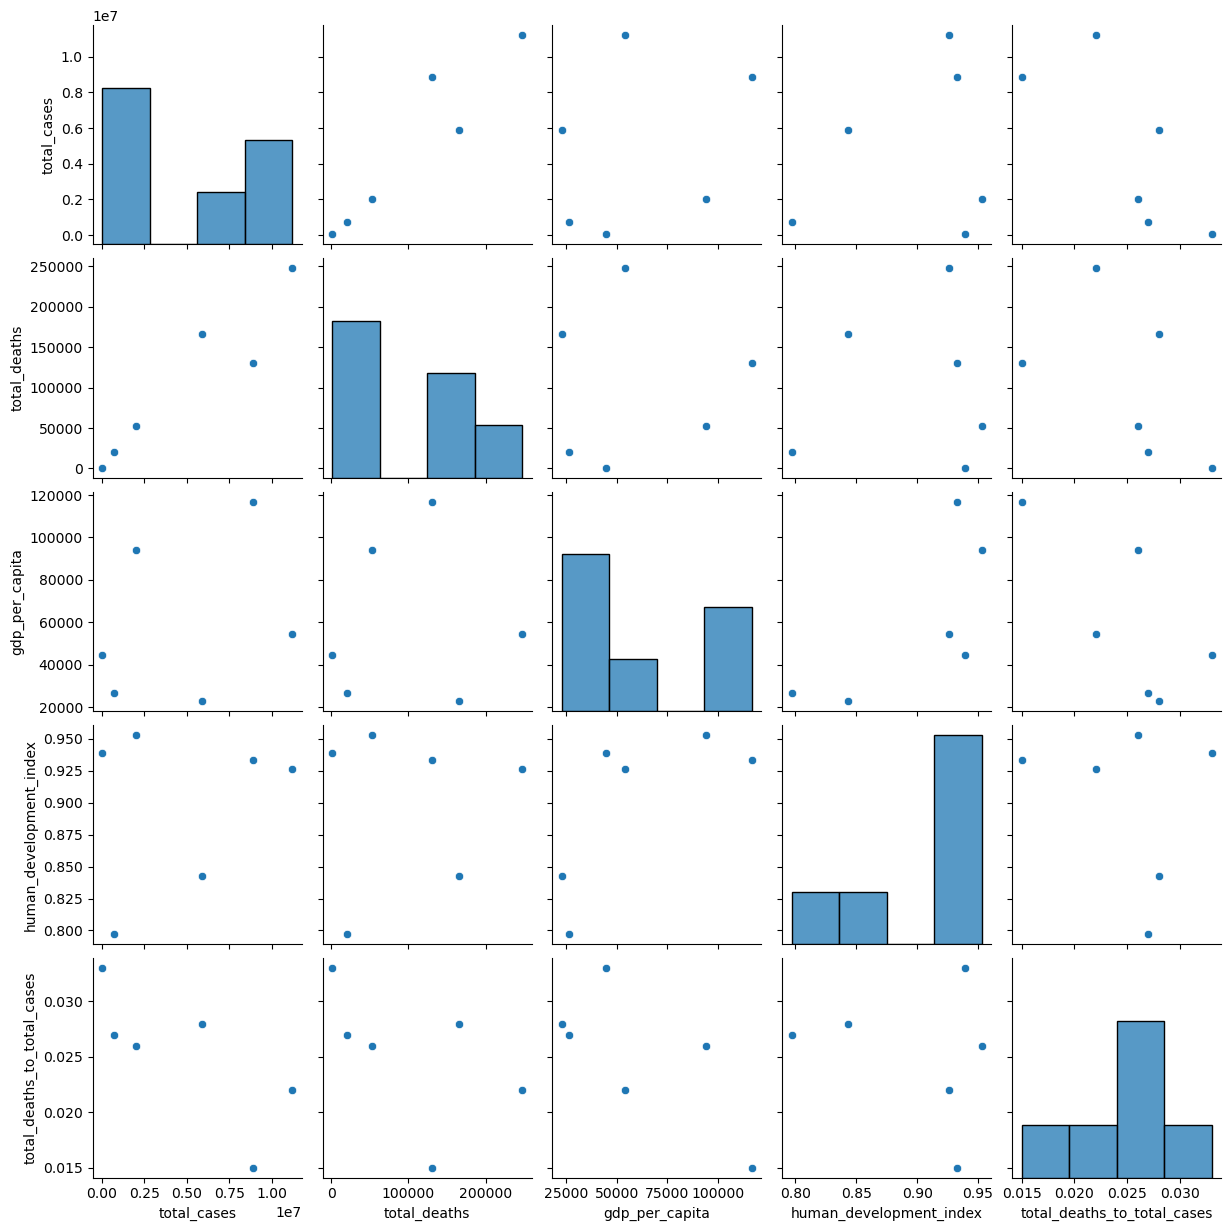

In [246]:
sns.pairplot(df_groupby)

d. Plot a bar plot of 'continent' column with 'total_cases' .

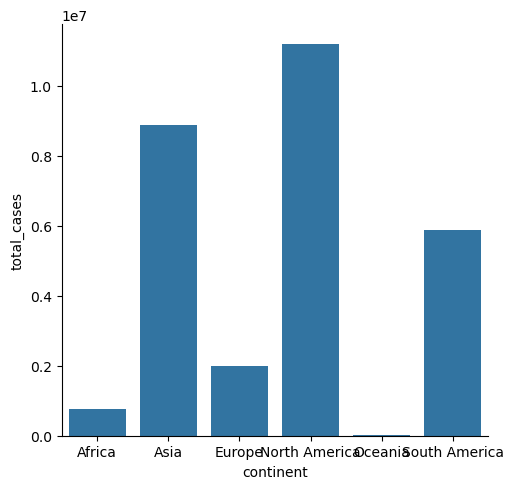

In [253]:
sns.catplot(data=df_groupby, x='continent', y='total_cases', kind='bar')